In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First Analysis: TeamIDs vs Mean Rank for the years 1990-2016

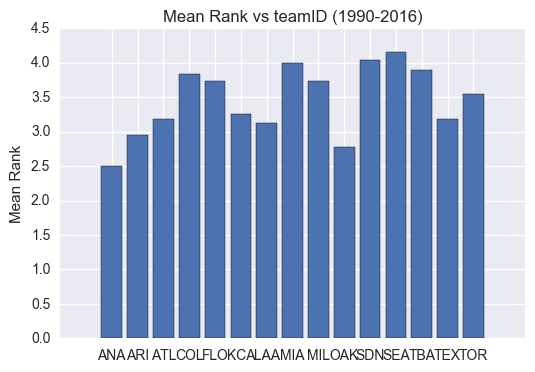

In [2]:
teams_df = pd.read_csv('Teams.csv')
grouped_by_teamID = teams_df.groupby('teamID', as_index=False).mean()
after_1990 = grouped_by_teamID.query('yearID>1990.0')
%matplotlib inline
x_pos = np.arange(len(after_1990['teamID']))
plt.bar(x_pos, after_1990['Rank'], align='center')
plt.xticks(x_pos, after_1990['teamID'])
plt.ylabel('Mean Rank')
plt.title('Mean Rank vs teamID (1990-2016)')

Second Analysis: Player's Batting Hand vs the Mean Hits, Runs and Home runs scored

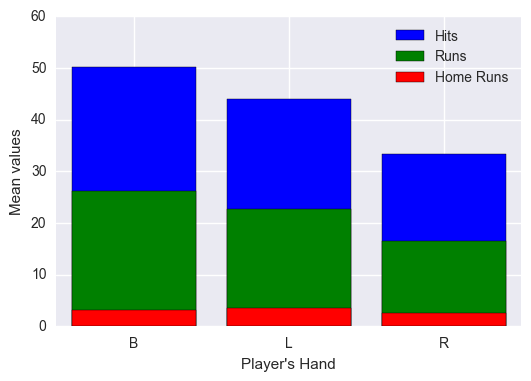

In [3]:
master_df = pd.read_csv('Master.csv')
batting_df = pd.read_csv('Batting.csv')
player_stats = master_df.merge(batting_df, on = 'playerID', how = 'inner')
batting_hand_Hits = player_stats.groupby('bats').mean()['H']
batting_hand_Runs = player_stats.groupby('bats').mean()['R']
batting_hand_HomeRuns = player_stats.groupby('bats').mean()['HR']
bats = player_stats.groupby('bats')
x_pos = np.arange(len(bats['bats']))
plt.bar(x_pos, bats.mean()['H'], label='Hits', color='Blue', align='center')
plt.bar(x_pos, bats.mean()['R'], label='Runs', color='Green', align='center')
plt.bar(x_pos, bats.mean()['HR'], label='Home Runs', color='Red', align='center')
plt.xticks(x_pos, [ind for ind, grp in bats['bats']])
plt.xlabel("Player's Hand")
plt.ylabel("Mean values")
plt.legend()

Third Analysis: Finding the player that has received the most number of "Most Valuable Player" awards

In [4]:
def max_occurences(x):
    maximum = 0
    for ind, grp in x:
        l = len(grp)
        if l>maximum:
            maximum = l
            pl_id = ind
    return pl_id, maximum

In [5]:
awards_players = pd.read_csv('AwardsPlayers.csv')
awards_players_mvp = awards_players.query('awardID == "Most Valuable Player"')
grouped_by_player = awards_players_mvp.groupby('playerID', as_index=False)
most_awards_player = max_occurences(grouped_by_player)
print "Player Name: "+master_df.loc[master_df.playerID == most_awards_player[0], 'nameGiven'].iloc[0]
print "Number of Most Valuable Player awards won: ", most_awards_player[1]

Player Name: Barry Lamar
Number of Most Valuable Player awards won:  7


Fourth Analysis: Player's Throwing Hand vs mean Hits, Homeruns allowed and Strikeouts

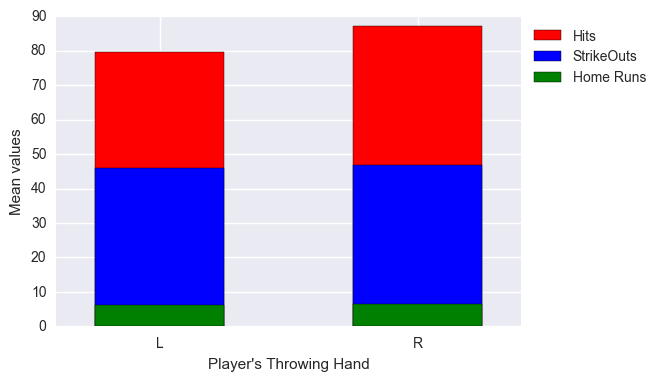

In [9]:
pitching_df = pd.read_csv("Pitching.csv")
pitching_stats = master_df.merge(pitching_df, on = 'playerID', how = 'inner')
pitching_stats_cleaned = pitching_stats[pitching_stats.throws != 'S']
grouped_by_throwing_hand = pitching_stats_cleaned.groupby('throws')
x_pos = np.arange(len(grouped_by_throwing_hand['throws']))
plt.bar(x_pos, grouped_by_throwing_hand.mean()['H'], label='Hits', color = 'red', width = 0.5, align = 'center')
plt.bar(x_pos, grouped_by_throwing_hand.mean()['SO'], label='StrikeOuts', color = 'blue', width = 0.5, align = 'center')
plt.bar(x_pos, grouped_by_throwing_hand.mean()['HR'], label='Home Runs', color = 'green', width = 0.5, align = 'center')
plt.xticks(x_pos, [ind for ind, grp in grouped_by_throwing_hand['throws']])
plt.xlabel("Player's Throwing Hand")
plt.ylabel("Mean values")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [16]:
x = player_stats.groupby('height').mean()['AB']
y = player_stats.groupby('height').mean()['BB']
print y

height
43.0     1.000000
63.0    15.428571
64.0    14.954128
65.0    24.058333
66.0    22.783201
67.0    18.306507
68.0    18.205174
69.0    17.731173
70.0    16.619124
71.0    15.728120
72.0    13.646373
73.0    12.361573
74.0    11.399140
75.0     9.798949
76.0     8.049273
77.0     6.028581
78.0     4.709760
79.0     3.535185
80.0     3.241379
81.0     0.272727
82.0     0.674419
83.0     0.000000
Name: BB, dtype: float64


AttributeError: Cannot access attribute 'values' of 'DataFrameGroupBy' objects, try using the 'apply' method